In [10]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model

In [11]:
df = pd.read_csv("C:/Users/avich/DataspellProjects/My_Project/QA_182.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df.drop_duplicates(keep='first', inplace=True)
# df.shape
df.shape

(182, 23)

In [12]:
df.columns

Index(['Salary Estimate', 'Annual Salary', 'Job Title', 'Experience',
       'Education', 'Position', 'Company Name', 'Location', 'Rating',
       'Is Remote', 'Company Old', 'Company Size', 'Founded',
       'Type of Ownership', 'Industry', 'Sector', 'Revenue',
       'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work Life Balance', 'Time Unit'],
      dtype='object')

# Starting the ML process

In [28]:
df_copy = df.copy()
var1 = 'Experience'
var2 = 'Work Life Balance'
var3 = 'Culture & Values'
var4 = 'Rating'
df_copy = df_copy[df_copy[var1] != -1]
df_copy = df_copy[df_copy[var2] != -1]
df_copy = df_copy[df_copy[var3] != -1]
df_copy = df_copy[df_copy[var4] != -1]

predict = 'Annual Salary'
data = df_copy[[predict, var1, var2, var3, var4]]

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

C:\Users\avich\AppData\Local\Temp\ipykernel_32968\2788599071.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1))


# Training section

In [29]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(f"acc = {acc}")
print(f"Coefficient: {linear.coef_}\n"
      f"Intercept: {linear.intercept_}")

acc = -0.009381374605814674
Coefficient: [ 1551.42580577 -1077.71871912 -1358.88194434  6721.71686391]
Intercept: 64062.21628845009


# Using the model to predict data about new students

In [30]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(f"Model prediction: {predictions[x]}      The input values: {x_test[x]}        The actual value: {y_test[x]}")

Model prediction: 84379.30280791539      The input values: [3.  3.5 4.  3.7]        The actual value: 57985.0
Model prediction: 79013.7354983474      The input values: [0.  2.8 3.1 3.3]        The actual value: 83899.0
Model prediction: 83470.74034095743      The input values: [3.  3.6 3.6 3.5]        The actual value: 116350.0
Model prediction: 89098.27418109837      The input values: [5.  3.5 3.8 3.9]        The actual value: 131890.0
Model prediction: 93705.51397221907      The input values: [6.  4.4 4.3 4.6]        The actual value: 94577.6
Model prediction: 76322.47288517749      The input values: [0.  3.3 3.2 3. ]        The actual value: 94836.0
Model prediction: 82114.01124227431      The input values: [2.  3.3 3.2 3.4]        The actual value: 80000.0
Model prediction: 80727.78197852516      The input values: [0.  3.2 3.5 3.7]        The actual value: 104573.0
Model prediction: 84310.03430245127      The input values: [0.  4.6 4.7 4.7]        The actual value: 31200.0


# Saving the model
### In real-life, it takes a lot of time and resources to train a model. In that case, it is crustal to know how to save it for the next ues
### We will use 'pickle' for this job

In [31]:
import pickle
with open('studentModel.pickle', 'wb') as f:  # writing in binary mood
    pickle.dump(linear, f)

pickle_in = open('studentModel.pickle', 'rb')
linear = pickle.load(pickle_in)

# Improving the model
We will keep one line of the initialization outside the for loop, because we will need them for other porpoises late.
The idea is to run in 'for' loop and keep the same logic, each iteration of the model will have different values **because they are split randomly.**
Each iteration of the model will update the file only if the acc score is better.


In [33]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)
best = 0

for _ in range(7000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)


    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        print(f"The best so for! {best}")

print(f"The final ACC = {best}")
with open('QA.pickle', 'wb') as f:
    pickle.dump(linear, f)



0.05841459382502545
The best so for! 0.05841459382502545
0.1019893766726071
The best so for! 0.1019893766726071
-0.9744561885521743
0.08595678428046782
-0.5269375927416384
0.03393626144008921
-0.12504157691968065
-1.3785645902643053
0.12710982764096512
The best so for! 0.12710982764096512
-0.6391867496645629
0.030082501624474678
0.17687457022080044
The best so for! 0.17687457022080044
-0.18068937468949553
0.13110679006451997
-0.8848902424590805
0.07863221798498032
-0.19998270728127054
-0.2997821561164318
-0.026083444660280453
0.3050956866844349
The best so for! 0.3050956866844349
-0.1245511540571238
0.04179823768753099
-0.26414848966496707
0.11677763316223044
-0.4545449442600533
0.012395430356740289
-0.2110490586026028
0.004822466034137385
0.0797952631838198
-0.1614260842666504
-0.5070880438600889
-0.1599661367755263
-0.284111596807068
-0.07142993431848543
-0.3938362316351014
-0.21924844000036603
-1.516484274393973
-0.028613355605802582
-0.42798619012414085
0.15823311576446009
0.070951

# Visualized the data
### Here we will see how to analyst the corrections between two variables

In [18]:
import  matplotlib.pyplot as pyplot
from matplotlib import style


Text(0, 0.5, 'Annual Salary')

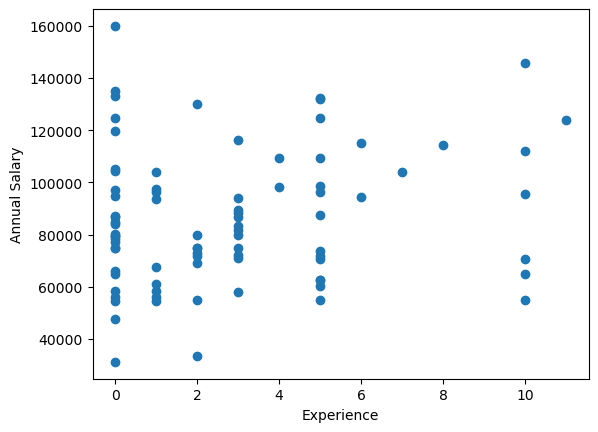

In [19]:
p = var1
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

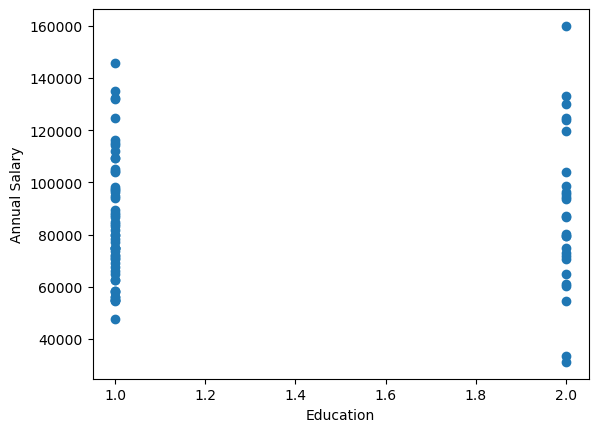

In [20]:
p = var2
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

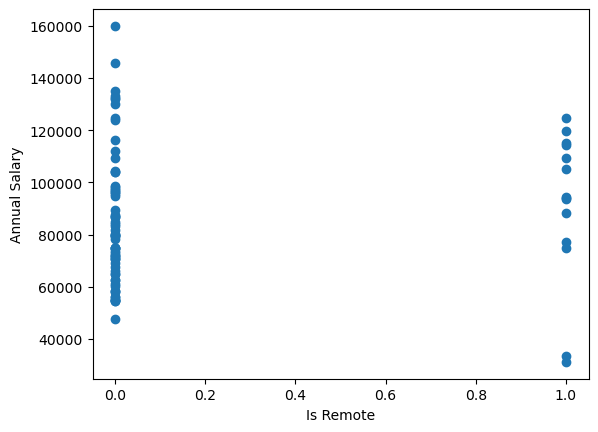

In [21]:
p = var3
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

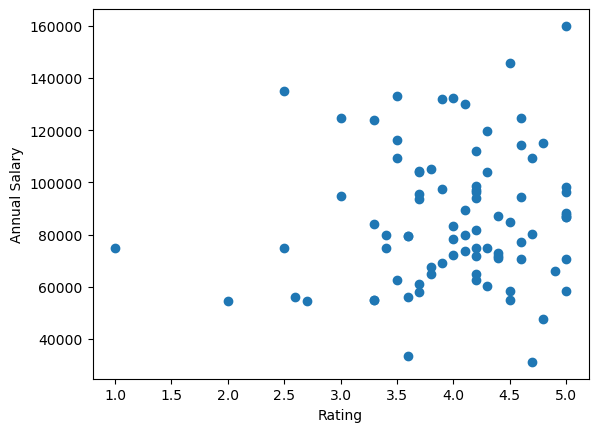

In [22]:
p = var4
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')
